In [14]:
import cv2
import camelot
import pandas as pd
import os
import pytesseract
from pdf2image import convert_from_path
from PIL import Image

ImportError: /home/cbugayer/anaconda3/envs/myenv/lib/python3.11/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/cbugayer/anaconda3/envs/myenv/lib/python3.11/site-packages/tesserocr/../../.././././libicuuc.so.75)

In [32]:
pages = convert_from_path("ExampleStatements/pnc_1.pdf", 720)

# extract text
text_data = ''
for page in pages:
    text = pytesseract.image_to_string(page)
    text_data += text + '\n'
print(text_data)

Savings Statement ®© PNC BANK

PNC Bank

Primary accountnumber: 55-6067-9966

Page lof2
For the period 09/01/2016 to 09/30/2016 Number ofenclosures: 0
JOSEPH B NOLAN SS For 24-hour banking, and transaction or
312 W LONDON AVE interest rate information, sign-on to
SALISBURY MD 21801-3664 ry PNC Bank Online Banking at pnc.com

For customer service call 1-888-PNC-BANK
Monday - Friday: 7 AM -10 PM ET
Saturday & Sunday: 8AM -5 PM ET

Para servicio en espanol, 1-866-HOLA-PNC

Moving? Please contact us at 1-888-PNC-BANK

Write to: Customer Service
PO Box 609
Pittsburgh, PA 15230-9738

visit us at pnc.com
3) TDD terminal: 1-800-531-1648
For hearing impaired clients only

IMPORTANT INFORMATION ABOUT YOUR ACCOUNT

We may report information regarding your Account to credit bureaus. If the Account is jointly held, we may
also report information to credit bureaus about any joint owner(s). Negative information, including closing
of the Account with an overdrawn balance owed or other defaults on the 

In [31]:
for f in os.listdir("ExampleOutputs"):
    print(f)

becu.txt
commerce.txt
first_citizens_1.txt
chase_4.txt
rbs_1.txt
citi_1.txt
us_1.txt
regions.txt
varo.txt
capital_one_2.txt
td_1.txt
ally_1.txt
citi_2.txt
bank_of_america_1.txt
rbs_2_cut.txt


In [34]:
existing_output_files = os.listdir("ExampleOutputs")
for i, filename in enumerate(os.listdir("ExampleStatements")):
    txt_filename = filename[:-4] + ".txt"
    if txt_filename in existing_output_files:
        continue
    print(i, " ", filename)
    try:
        pages = convert_from_path("ExampleStatements/" + filename, 720)
    except:
        print("Error reading file: ", filename)
        continue
    # pages = convert_from_path("ExampleStatements/" + filename, 720)
    f = open("ExampleOutputs/" + txt_filename, "a")
    for page in pages:
        text = pytesseract.image_to_string(page)
        f.write(text + '\n')
    f.close()

15   td_2.pdf
Error reading file:  td_2.pdf
16   chase_1.pdf
17   capital_one_1.pdf
18   rbs_3.pdf
19   wells_fargo_2.pdf
20   pnc_1.pdf
21   bank_of_america_2.pdf
22   bmo_1.pdf
23   chase_2.pdf
24   wells_fargo_1.pdf
25   truist.pdf
26   us_2.pdf
27   chase_3.pdf


In [ ]:
import os
import camelot

pdf_files = []
for f in os.listdir('ExampleStatements'):
    try:
        tables = camelot.read_pdf(r"ExampleStatements/" + f, flavor='stream', pages=str(0))
        if len(tables) == 0:
            pdf_files.append(f)
    except KeyError as e:
        print(f"Error processing file {f}: {e}")

pdf_files.sort()
print(pdf_files)

3


/tmp/ipykernel_233293/660232008.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tables[i], kind='contour').show()


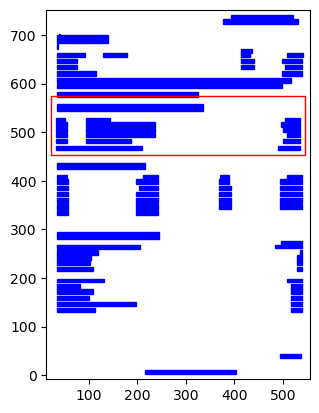

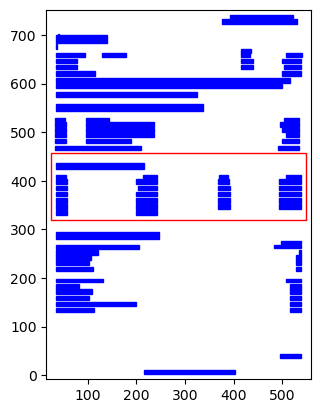

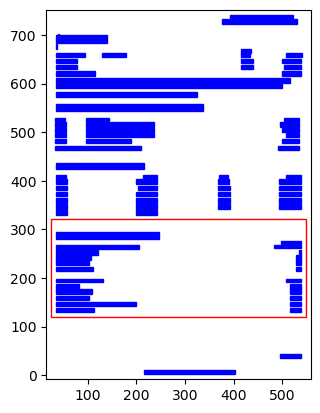

In [15]:
pdf_path = r"ExampleStatements/chase_1.pdf"

tables = camelot.read_pdf(pdf_path, flavor='stream', pages=str(0))
print(len(tables))
if len(tables) == 0:
    print("No tables found")
else:
    for i in range(len(tables)):
        camelot.plot(tables[i], kind='contour').show()
